In [1]:

!pip install pandas 
!pip install seaborn 
!pip install matplotlib
!pip install nltk
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 51.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 52.5 MB/s eta 0:00:00a 0:00:01
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
You should consider upgrading via the '/Users/paulapivat/.pyenv/versions/3.10.4/envs/clean-env/bin/python3.10 -m pip install --upgrade pip' command.
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.3 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.3 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/

In [2]:
import sys
print(sys.executable)

/Users/paulapivat/.pyenv/versions/3.10.4/envs/clean-env/bin/python


In [3]:
!pip install hdbscan

  Using cached hdbscan-0.8.33-cp310-cp310-macosx_13_0_arm64.whl
  Using cached Cython-0.29.37-py2.py3-none-any.whl (989 kB)
You should consider upgrading via the '/Users/paulapivat/.pyenv/versions/3.10.4/envs/clean-env/bin/python3.10 -m pip install --upgrade pip' command.


In [4]:
!pip install bertopic

  Using cached bertopic-0.16.1-py2.py3-none-any.whl (158 kB)
  Using cached plotly-5.21.0-py3-none-any.whl (15.7 MB)
  Using cached sentence_transformers-2.7.0-py3-none-any.whl (171 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl (85 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
  Using cached transformers-4.40.1-py3-none-any.whl (9.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 29.5 MB/s eta 0:00:0000:0100:01
  Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
  Using cached pynndescent-0.5.12-py3-none-any.whl (56 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 KB 16.7 MB/s eta 0:00:00
  Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 30.3 MB/s eta 0:00:0000:0100:01
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  

In [ ]:
import pandas as pd 

csv_df = pd.read_csv("../proposals.csv")

csv_df

In [6]:

target_columns = csv_df[['tier', 'proposal_description']]

target_columns


,tier,proposal_description
0,Tier 2,# Intent #4 Budget Proposal \n Season 4 lays t...
1,Tier 2,# Season 5: Intents Budget Proposal #2 \nThis ...
2,Tier 4,Delegate Suspension: Fractal Visions - All Opt...
3,Tier 4,# Anticapture Commission\nSeason 5 introduces ...
4,Tier 4,<nil>
...,...,...
2881,Tier 4,# Proposal to Reclassify Grant Misusage Enforc...
2882,Tier 4,# Ratify Security Council Members\nIf approved...
2883,Tier 4,Upgrade Proposal: Bedrock - This proposal outl...
2884,Tier 4,# Proposal to Reclassify Grant Misusage Enforc...


In [7]:
# Preparing Text cleaning and normalization
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

csv_df['processed_description'] = csv_df['proposal_description'].apply(preprocess_text)

csv_df['processed_description']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paulapivat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paulapivat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       intent 4 budget proposal n season 4 lay ground...
1       season 5 intent budget proposal 2 proposal see...
2       delegate suspension fractal vision optimism de...
3       anticapture commission season 5 introduces ant...
4                                                     nil
                              ...                        
2881    proposal reclassify grant misusage enforcement...
2882    ratify security council member approved member...
2883    upgrade proposal bedrock proposal outline opti...
2884    proposal reclassify grant misusage enforcement...
2885    intent 2 council intent budget proposal n seas...
Name: processed_description, Length: 2886, dtype: object

In [8]:
# Topic Modeling using sklearn instead of scipy / gensim 

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer 

# Tokenize and vectorize text using CountVectorizer 
vectorizer = CountVectorizer(min_df=20, max_df=0.5)  # min_df and max_df are similar to no_below and no_above in gensim
dtm = vectorizer.fit_transform(csv_df['processed_description'])  # Document-term matrix

# Apply Latent Dirichlet Allocation (LDA)
lda = LatentDirichletAllocation(n_components=10, random_state=0, max_iter=15)
lda.fit(dtm)

# Function to find the dominant topic for each description
def dominant_topic(text):
    bow = vectorizer.transform([text])
    topic_probs = lda.transform(bow)
    return topic_probs.argmax()

# Apply function to the DataFrame
csv_df['dominant_topic'] = csv_df['processed_description'].apply(dominant_topic)

# Print the topics found by the LDA model
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_features = topic.argsort()[-5:]  # Get indices of the top 5 words in this topic
    words = [feature_names[i] for i in top_features]
    print(f"Topic {topic_idx + 1}: {' '.join(words)}")

# Analyze topic distribution by tier
topic_by_tier = csv_df.groupby('tier')['dominant_topic'].value_counts(normalize=True)
print(topic_by_tier)

Topic 1: conduct season grant budget council
Topic 2: mission proposed season budget intent
Topic 3: season program protocol delegation chain
Topic 4: security ecotone council vote upgrade
Topic 5: enforcement suspension delegate conduct code
Topic 6: developer lead advisory board member
Topic 7: initial optimism year budget foundation
Topic 8: network vote optimism canyon upgrade
Topic 9: protocol bedrock delta optimism upgrade
Topic 10: delegate house season commission anticapture
tier    dominant_topic
Tier 1  8                 0.191011
        1                 0.168539
        4                 0.146067
        2                 0.123596
        0                 0.112360
        5                 0.067416
        6                 0.067416
        3                 0.056180
        7                 0.033708
        9                 0.033708
Tier 2  1                 0.173387
        8                 0.153226
        2                 0.145161
        4                 0.129032

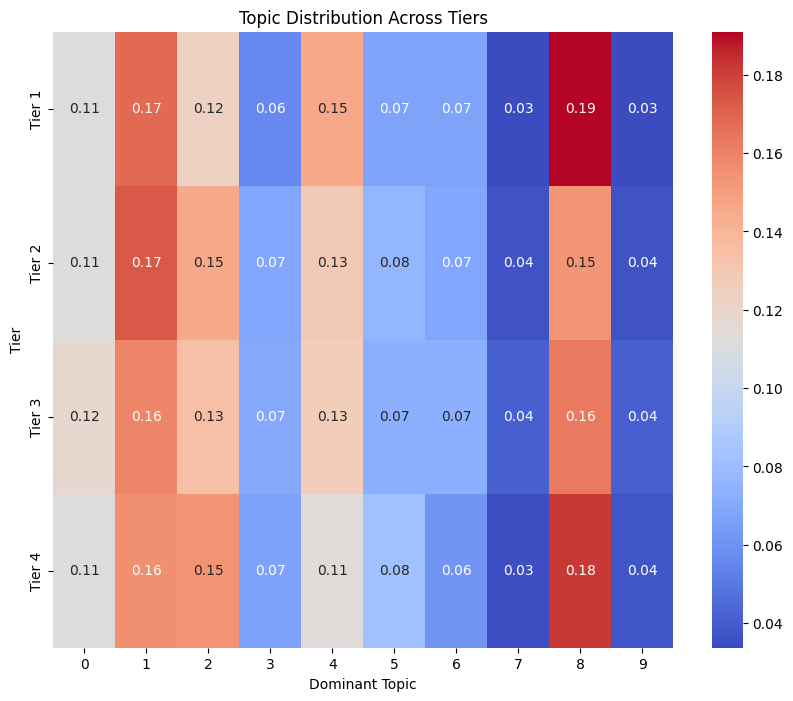

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the 'dominant_topic' counts to a percentage for better comparison
topic_distribution = csv_df.groupby(['tier', 'dominant_topic']).size().unstack(fill_value=0)
topic_distribution = topic_distribution.divide(topic_distribution.sum(axis=1), axis=0)

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(topic_distribution, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Topic Distribution Across Tiers')
plt.ylabel('Tier')
plt.xlabel('Dominant Topic')
plt.show()


2024-04-27 23:26:56,981 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 91/91 [00:04<00:00, 18.56it/s]
2024-04-27 23:27:05,634 - BERTopic - Embedding - Completed ✓
2024-04-27 23:27:05,634 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-04-27 23:27:14,451 - BERTopic - Dimensionality - Completed ✓
2024-04-27 23:27:14,452 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-04-27 23:27:14,646 - BERTopic - Cluster - Completed ✓
2024-04-27 23:27:14,648 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-04-27 23:27:14,772 - BERTopic - Representation - Completed ✓
/var/folders/v0/71tqdwzx1_11vzpcg1y_4mj80000gn/T/ipykernel_89366/3275674422.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include

(141,)
tier           
Tier 1  Topic 0    0.420354
        Topic 1    0.701596
        Topic 2    0.520144
        Topic 3    0.785147
        Topic 4    0.437160
dtype: float64
bertopic_topic        0         1         2         3         4         5   \
tier                                                                         
Tier 1          0.420354  0.701596  0.520144  0.785147  0.437160  0.567969   
Tier 2          0.582814  0.433334  0.592395  0.280707  0.529192  0.283397   
Tier 3          0.523329  0.325468  0.472192  0.501004  0.498631  0.464499   
Tier 4          0.567087  0.447956  0.515803  0.481916  0.536884  0.457914   

bertopic_topic        6         7         8         9   ...        29  \
tier                                                    ...             
Tier 1          0.418827  0.352775  0.747517  0.667590  ...  0.905733   
Tier 2          0.596986  0.547233  0.391995  0.539240  ...  0.264496   
Tier 3          0.524880  0.435323  0.584492  0.585422  ...  

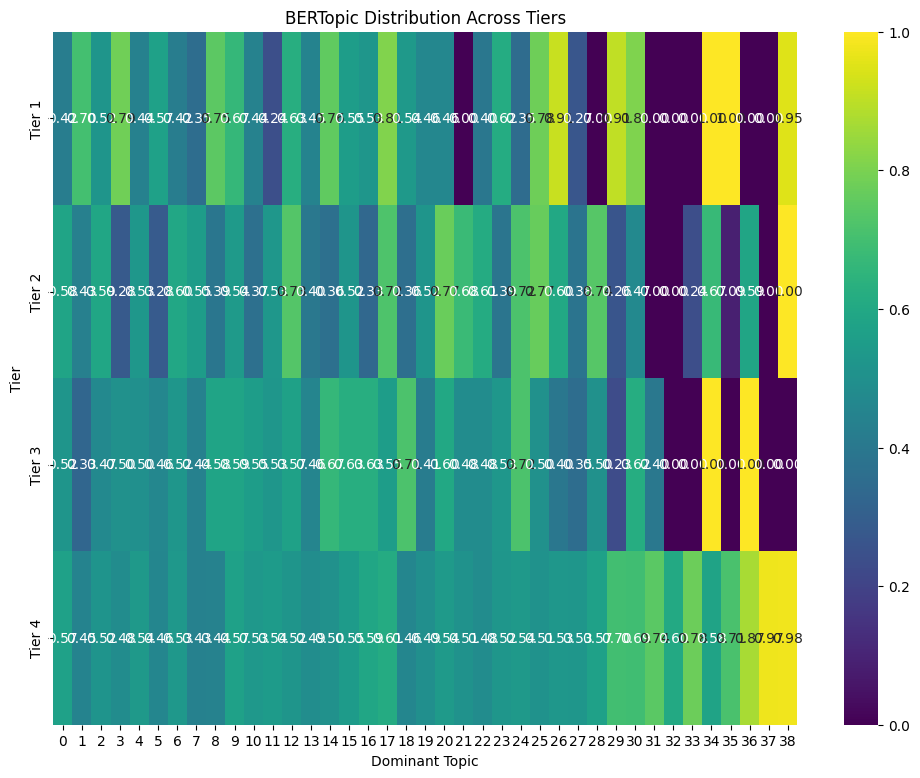

In [12]:
import bertopic
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups  # Only for demonstration purposes

# Load your data (for demonstration, using newsgroups data)
# Replace this with your own data: texts = csv_df['processed_description'].tolist()
data = fetch_20newsgroups(subset='all')['data']
texts = csv_df['processed_description'].tolist() 

# Create and fit the BERTopic model
model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probabilities = model.fit_transform(texts)

# Get topic info
model.get_topic_info()

# To get individual topic representations (change topic number accordingly)
model.get_topic(0)  # Example for topic 0

# You can use the `probabilities` array to analyze the distribution of topics across your tiers
# First, add topics and their probabilities back to your DataFrame
csv_df['bertopic_topic'] = topics
# This assumes every document has at least one topic with a probability.
csv_df['bertopic_probability'] = [max(prob) if len(prob) > 0 else None for prob in probabilities]

# Now aggregate these topics by 'tier'
topic_by_tier_bertopic = csv_df.groupby('tier').apply(
    lambda df: pd.Series(
        [df[df['bertopic_topic'] == topic]['bertopic_probability'].mean() for topic in sorted(df['bertopic_topic'].unique())],
        index=[f"Topic {topic}" for topic in sorted(df['bertopic_topic'].unique())]
    )
)

print(topic_by_tier_bertopic.shape)
print(topic_by_tier_bertopic.head())

# Create a DataFrame with necessary information
topics_df = csv_df[['tier', 'bertopic_topic', 'bertopic_probability']]

# Pivot this data to get topics as columns and tiers as rows
topic_by_tier_pivot = topics_df.pivot_table(
    index='tier',
    columns='bertopic_topic',
    values='bertopic_probability',
    aggfunc='mean'
)

# Fill NaN values with 0 if any topic did not appear in a tier
topic_by_tier_pivot = topic_by_tier_pivot.fillna(0)

print(topic_by_tier_pivot.head())

# Visualize this new distribution
plt.figure(figsize=(12, 9))
sns.heatmap(topic_by_tier_pivot, annot=True, cmap='viridis', fmt=".2f")
plt.title('BERTopic Distribution Across Tiers')
plt.ylabel('Tier')
plt.xlabel('Dominant Topic')
plt.show()


In [13]:
# Assuming topic_by_tier_pivot is your final pivot table used for the heatmap
dominant_topics = topic_by_tier_pivot.columns.tolist()

# Print the list of dominant topics
print("List of Dominant Topics:")
print(dominant_topics)

List of Dominant Topics:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [15]:
csv_df.columns

Index(['tier', 'toDelegate', 'ens_name', 'proposal_link', 'proposal_type',
       'proposal_id', 'proposal_description', 'rn', 'processed_description',
       'dominant_topic', 'bertopic_topic', 'bertopic_probability'],
      dtype='object')

In [20]:
import numpy as np


# Make a copy of the original DataFrame to preserve it
filtered_df = csv_df.copy()

# Conditions for each tier and the corresponding dominant topics
conditions = {
    'Tier 1': [34, 35],
    'Tier 2': [38],
    'Tier 3': [34, 36],
    'Tier 4': [37, 38]
}

# Create a mask that marks rows that do not meet the condition
mask = filtered_df.apply(lambda x: x['bertopic_topic'] not in conditions.get(x['tier'], []), axis=1)

# Use the mask to replace proposal_description values that don't meet the condition with a placeholder or empty string
filtered_df.loc[mask, 'proposal_description'] = "<nil>"

# Now filtered_df has proposal_description hidden where the conditions were not met
# The DataFrame still retains all 2886 rows
filtered_df[['tier', 'proposal_description', 'bertopic_topic']]

# Filter out rows where proposal_description is "<nil>"
filtered_non_nil_df = filtered_df[filtered_df['proposal_description'] != "<nil>"]

# Display the resulting DataFrame
filtered_non_nil_df[['tier', 'proposal_description', 'bertopic_topic']]


,tier,proposal_description,bertopic_topic
106,Tier 4,"# Mission Requests: Intent #4, 1.33M OP\nIn Se...",37
485,Tier 4,"# Mission Requests: Intent #3, 1.33M OP\nIn Se...",37
523,Tier 4,"# Mission Requests: Intent #4, 1.33M OP\nIn Se...",37
722,Tier 4,"# Mission Requests: Intent #3, 1.33M OP\nIn Se...",37
862,Tier 4,# Grants Council Reviewer Elections: Growth Ex...,38
968,Tier 1,Test Vote 3: All Together Now -- Come try out ...,35
1251,Tier 4,"# Mission Requests: Intent #3, 1.33M OP\nIn Se...",37
1296,Tier 1,Test Vote 3: All Together Now -- Come try out ...,35
1461,Tier 4,"# Mission Requests: Intent #4, 1.33M OP\nIn Se...",37
1524,Tier 4,# Council Reviewer Elections: Growth Experimen...,38


In [21]:
!pip install wordcloud matplotlib


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 KB 6.9 MB/s eta 0:00:00
You should consider upgrading via the '/Users/paulapivat/.pyenv/versions/3.10.4/envs/clean-env/bin/python3.10 -m pip install --upgrade pip' command.


In [22]:
import pandas as pd 

target_columns = csv_df[['tier', 'proposal_description']]

# Group by 'tier' and concatenate 'proposal_description' within each group
concatenated_descriptions = target_columns.groupby('tier')['proposal_description'].apply(lambda x: ' '.join(x.dropna()))

# Print the result
print(concatenated_descriptions)

tier
Tier 1    # Protocol Upgrade #4\nThis upgrade, proposed ...
Tier 2    # Intent #4 Budget Proposal \n Season 4 lays t...
Tier 3    # Upgrade #2: Canyon Protocol Upgrade\nThis pr...
Tier 4    Delegate Suspension: Fractal Visions - All Opt...
Name: proposal_description, dtype: object


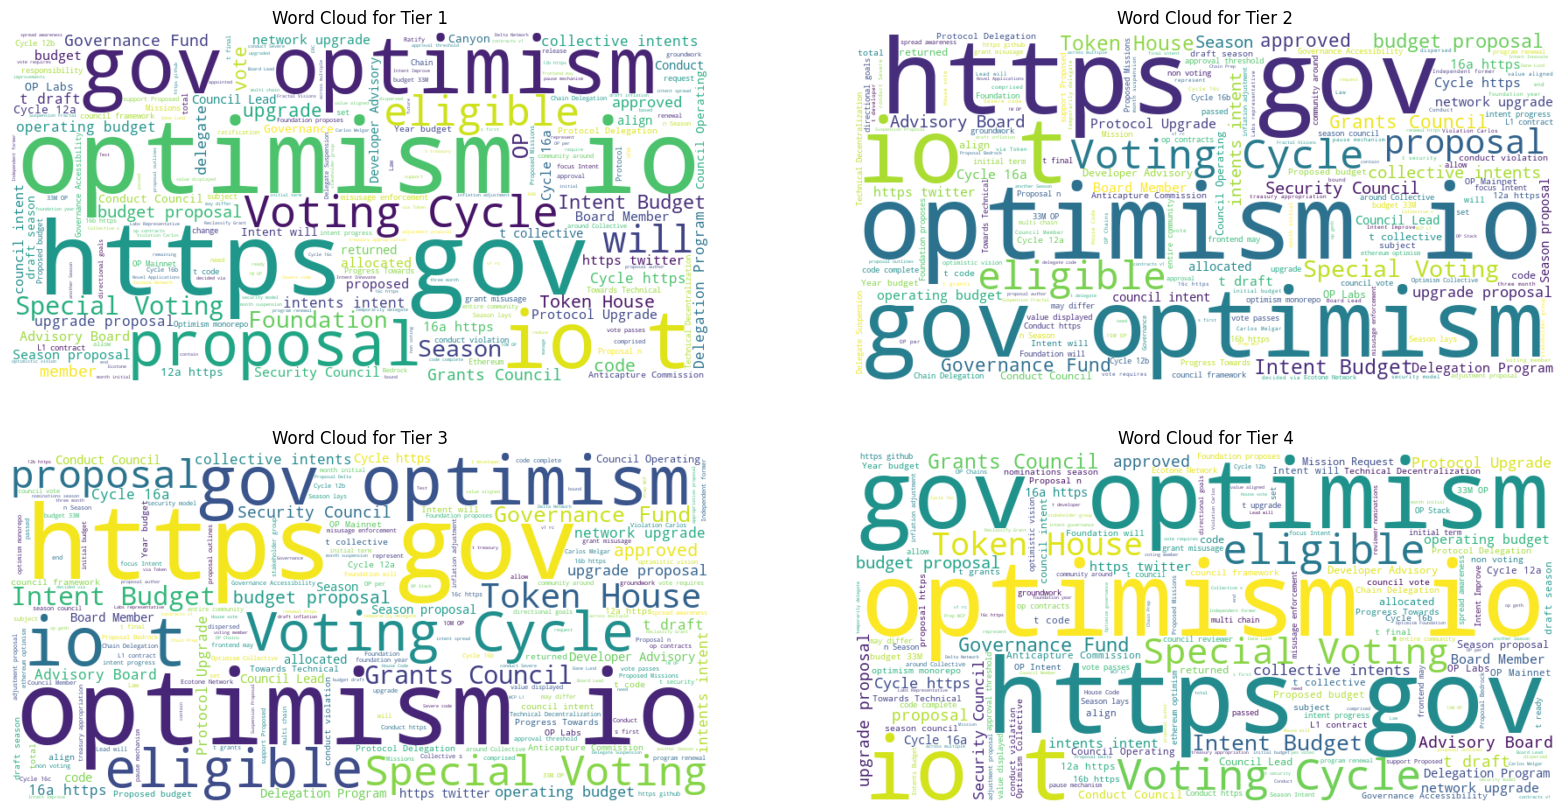

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Set the figure size for the word clouds
plt.figure(figsize=(20, 10))

# Loop through each tier and create a word cloud
for i, (tier, group) in enumerate(target_columns.groupby('tier'), 1):
    # Concatenate all proposal descriptions in the current tier
    text = " ".join(description for description in group['proposal_description'] if isinstance(description, str))
    
    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plotting the word cloud
    plt.subplot(2, 2, i)  # Adjust subplot layout depending on the number of tiers; this assumes at most 4 tiers
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {tier}')
    plt.axis('off')

plt.show()